In [1]:
import os # 경고 대응
os.environ['OMP_NUM_THREADS'] = '1'

import pandas as pd
import numpy as np

df = pd.read_csv("dsfsdf.csv")

df

,5대범죄,CCTV,인구밀도,가로등,경찰서수,여성인구,112신고건수,인구,강남구,강동구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,8617,830,14728,8988,25,282162,169303,581760,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5244,154,18842,8651,20,223788,94193,463321,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4257,124,14172,6977,13,163606,79634,334426,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5585,199,14376,5299,16,292237,116561,595691,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6345,609,17891,4981,11,257655,113627,529031,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2381,228,10852,5789,19,114778,70794,237285,0,0,...,0,0,0,0,0,1,0,0,0,0
171,3244,471,16061,12593,21,239230,91838,477173,0,0,...,0,0,0,0,0,0,1,0,0,0
172,2712,0,6431,14351,23,77490,69511,153789,0,0,...,0,0,0,0,0,0,0,1,0,0
173,2861,403,13231,14822,22,65653,127597,131787,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
f1 = df.iloc[:,6:7]
test=np.array(f1)
output=test
test

array([[169303],
       [ 94193],
       [ 79634],
       [116561],
       [113627],
       [ 92547],
       [ 89610],
       [ 68027],
       [ 32992],
       [ 96246],
       [ 58027],
       [ 71189],
       [110374],
       [ 68579],
       [ 99429],
       [ 58252],
       [ 79826],
       [134780],
       [ 79155],
       [118640],
       [ 73050],
       [ 88986],
       [ 77520],
       [132963],
       [ 92500],
       [167991],
       [ 87446],
       [ 76723],
       [111972],
       [108733],
       [ 88093],
       [ 86042],
       [ 64011],
       [ 31841],
       [ 90428],
       [ 56850],
       [ 68460],
       [108067],
       [ 68122],
       [ 99020],
       [ 54597],
       [ 76671],
       [125015],
       [ 76584],
       [113566],
       [ 70451],
       [ 86372],
       [ 76078],
       [129730],
       [ 84880],
       [170135],
       [ 89844],
       [ 74852],
       [113142],
       [107344],
       [ 86536],
       [ 84232],
       [ 62881],
       [ 29090

In [3]:
train = np.array(df[df.columns.difference(['112신고건수'])]) # data
input=np.column_stack(train) 
a = input.T 
a.shape

(175, 32)

In [4]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(a,output) # 스케일링된 값과

In [5]:
import xgboost
from sklearn.metrics import explained_variance_score

xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(train_input,train_output)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

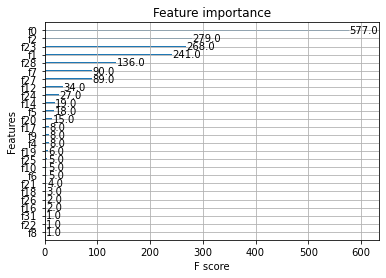

In [6]:
xgboost.plot_importance(xgb_model)

In [7]:
predictions = xgb_model.predict(test_input)
predictions

array([ 84098.57 ,  64655.32 ,  40076.562,  76312.99 ,  71213.664,
        77562.484,  71999.59 , 119305.86 ,  91670.22 , 109197.664,
       116633.766, 126877.945,  68714.22 ,  75892.41 ,  85614.53 ,
        77552.01 ,  87662.55 ,  99793.   ,  84748.32 ,  70604.53 ,
       119514.38 ,  66018.71 , 110056.13 ,  76013.94 , 127763.88 ,
       118382.18 ,  86664.07 , 111906.85 ,  61772.727,  87826.68 ,
        73230.7  ,  47160.234,  84684.23 ,  72904.15 ,  99683.01 ,
        69721.625,  75695.3  , 110330.   , 116550.38 , 101656.25 ,
        52574.   , 100372.82 , 125818.74 ,  84907.586], dtype=float32)

In [8]:
r_sq = xgb_model.score(test_input, test_output)
print(r_sq)
print(explained_variance_score(predictions,test_output))

0.7969370823300117
0.6365102502312034
